In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

In [64]:
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.arima_model import ARMA
from time import time

# Generate Data

In [11]:
#read data
ush_m_cln = pd.read_csv('ush_m_cln.csv')
ush_m_cln.drop(ush_m_cln.columns[0], axis=1, inplace=True)


ush_m_cln.head()

,mortgage
0,-0.1215
1,-0.0475
2,0.7975
3,0.7635
4,-0.0585


In [12]:
ush = pd.read_csv('dataraw00.csv')
ush_m = ush.copy()
ush_m.drop(ush_m.columns[[2,3,4,5,6,1,8]], axis=1, inplace=True)

#rename columns to something more understandable
ush_m.rename(columns={'Date':'date', 'Mortgage_Rate':'mortgage'}, 
             inplace=True)

date_extracted = ush_m["date"]

  
ush_m_cln = ush_m_cln.join(date_extracted)

display(ush_m_cln)


,mortgage,date
0,-0.1215,1/1/1987
1,-0.0475,2/1/1987
2,0.7975,3/1/1987
3,0.7635,4/1/1987
4,-0.0585,5/1/1987
...,...,...
414,-0.0255,7/1/2021
415,0.0575,8/1/2021
416,0.1675,9/1/2021
417,0.0000,10/1/2021


In [13]:
#convert date column to datetime type
ush_m_cln['date'] = pd.to_datetime(ush_m_cln.date)

#set date as index
ush_m_cln.set_index('date', inplace=True)

#show result
ush_m_cln.tail()

,mortgage
date,
2021-07-01,-0.0255
2021-08-01,0.0575
2021-09-01,0.1675
2021-10-01,0.0000
2021-11-01,0.0305


In [25]:
ush_m_cln.shape

(419, 1)

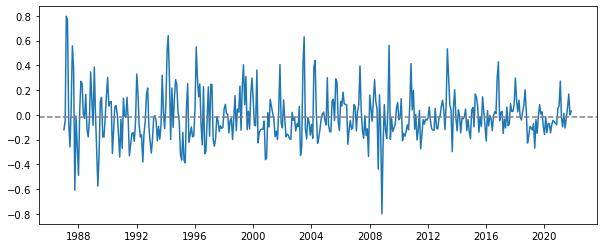

In [19]:
plt.figure(figsize=(10,4))
plt.plot(ush_m_cln)
plt.axhline(ush_m_cln['mortgage'].mean(), linestyle='--', color='grey')

In [131]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

# ACF

<BarContainer object of 20 artists>

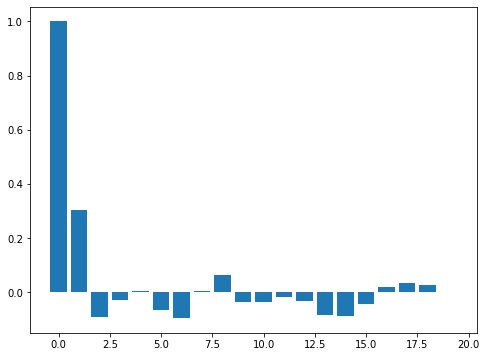

In [73]:
acf_vals_m = acf(ush_m_cln)
num_lags_m = 20

plt.figure(figsize=(8,6))

plt.bar(range(num_lags_m), acf_vals_m[:num_lags_m])

Lag 1


# PACF

<BarContainer object of 25 artists>

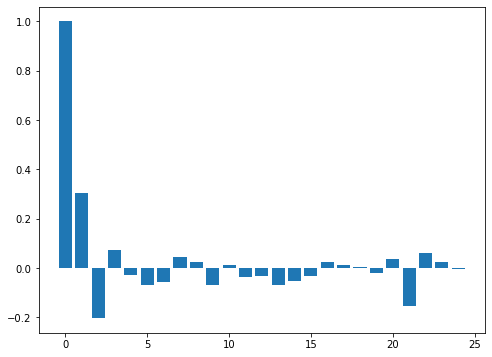

In [24]:
pacf_vals_m = pacf(ush_m_cln)
num_lags_m = 25

plt.figure(figsize=(8,6))
plt.bar(range(num_lags_m), pacf_vals_m[:num_lags_m])

Lags 1 2 maybe

# Get training and testing sets

In [66]:
#infer the frequency of the data
ush_m_cln = ush_m_cln.asfreq(pd.infer_freq(ush_m_cln.index))


In [118]:
ush_m_cln.head()

,mortgage
date,
1987-01-01,-0.1215
1987-02-01,-0.0475
1987-03-01,0.7975
1987-04-01,0.7635
1987-05-01,-0.0585


In [119]:
train_data_m = ush_m_cln[ush_m_cln.index < pd.to_datetime("2020-12-31", format='%Y-%m-%d')]
test_data_m = ush_m_cln[ush_m_cln.index > pd.to_datetime("2020-12-31", format='%Y-%m-%d')]

# Fit ARIMA Model

In [ ]:
# # plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [90]:
#AR lag = 2
from statsmodels.tsa.ar_model import AutoReg
ar_model_m = AutoReg(train_data_m, lags=2).fit()
#
#
print(ar_model_m.summary())

                            AutoReg Model Results                             
Dep. Variable:               mortgage   No. Observations:                  384
Model:                     AutoReg(2)   Log Likelihood                  95.181
Method:               Conditional MLE   S.D. of innovations              0.189
Date:                Sun, 19 Feb 2023   AIC                             -3.315
Time:                        14:41:59   BIC                             -3.274
Sample:                    03-01-1987   HQIC                            -3.299
                         - 12-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -0.0101      0.010     -1.046      0.296      -0.029       0.009
mortgage.L1     0.3648      0.050      7.293      0.000       0.267       0.463
mortgage.L2    -0.2112      0.050     -4.217    

In [91]:
#AR lag = 21
from statsmodels.tsa.ar_model import AutoReg

ar_model_m = AutoReg(train_data_m, lags=21).fit()
#
#
print(ar_model_m.summary())

                            AutoReg Model Results                             
Dep. Variable:               mortgage   No. Observations:                  384
Model:                    AutoReg(21)   Log Likelihood                 124.412
Method:               Conditional MLE   S.D. of innovations              0.172
Date:                Sun, 19 Feb 2023   AIC                             -3.397
Time:                        14:42:23   BIC                             -3.150
Sample:                    10-01-1988   HQIC                            -3.299
                         - 12-01-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.0199      0.010     -2.042      0.041      -0.039      -0.001
mortgage.L1      0.3544      0.052      6.836      0.000       0.253       0.456
mortgage.L2     -0.1930      0.055     -3.51

C:\Apps\anaconda\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Apps\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [92]:
#AR lag = 28
from statsmodels.tsa.ar_model import AutoReg
ar_model_m = AutoReg(train_data_m, lags=28).fit()

print(ar_model_m.summary())


                            AutoReg Model Results                             
Dep. Variable:               mortgage   No. Observations:                  384
Model:                    AutoReg(28)   Log Likelihood                 127.648
Method:               Conditional MLE   S.D. of innovations              0.169
Date:                Sun, 19 Feb 2023   AIC                             -3.386
Time:                        14:43:08   BIC                             -3.060
Sample:                    05-01-1989   HQIC                            -3.257
                         - 12-01-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.0197      0.010     -1.940      0.052      -0.040       0.000
mortgage.L1      0.3696      0.053      7.018      0.000       0.266       0.473
mortgage.L2     -0.1858      0.056     -3.32

C:\Apps\anaconda\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Apps\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [100]:
#MA  lag = 1


ma_model_m = ARIMA(train_data_m, order=(0,0,1))

#fit the model
model_fit_m = ma_model_m.fit()

print(model_fit_m.summary())

                               SARIMAX Results                                
Dep. Variable:               mortgage   No. Observations:                  384
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  95.807
Date:                Sun, 19 Feb 2023   AIC                           -185.614
Time:                        14:56:44   BIC                           -173.762
Sample:                    01-01-1987   HQIC                          -180.913
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0124      0.014     -0.894      0.371      -0.040       0.015
ma.L1          0.4127      0.038     10.804      0.000       0.338       0.488
sigma2         0.0355      0.002     17.819      0.0

In [93]:
#MA  lag = 2


ma_model_m = ARIMA(train_data_m, order=(0,0,2))

#fit the model
model_fit_m = ma_model_m.fit()

print(model_fit_m.summary())

                               SARIMAX Results                                
Dep. Variable:               mortgage   No. Observations:                  384
Model:                 ARIMA(0, 0, 2)   Log Likelihood                  96.781
Date:                Sun, 19 Feb 2023   AIC                           -185.563
Time:                        14:45:23   BIC                           -169.760
Sample:                    01-01-1987   HQIC                          -179.295
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0123      0.013     -0.951      0.342      -0.038       0.013
ma.L1          0.3749      0.042      8.915      0.000       0.293       0.457
ma.L2         -0.0723      0.048     -1.508      0.1

In [94]:
#MA  lag = 6 from acf train_m trong R


ma_model_m = ARIMA(train_data_m, order=(0,0,6))

#fit the model
model_fit_m = ma_model_m.fit()

print(model_fit_m.summary())

                               SARIMAX Results                                
Dep. Variable:               mortgage   No. Observations:                  384
Model:                 ARIMA(0, 0, 6)   Log Likelihood                  98.609
Date:                Sun, 19 Feb 2023   AIC                           -181.219
Time:                        14:46:06   BIC                           -149.614
Sample:                    01-01-1987   HQIC                          -168.683
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0127      0.011     -1.131      0.258      -0.035       0.009
ma.L1          0.3678      0.041      8.887      0.000       0.287       0.449
ma.L2         -0.0933      0.051     -1.816      0.0

In [96]:
#ARMA 202
arma_model_m = ARIMA(train_data_m, order=(2,0,2))

start = time()
model_fit_m = arma_model_m.fit()
end = time()
print('Model Fitting Time', end - start)

Model Fitting Time 0.30019545555114746


In [97]:
print(model_fit_m.summary())

                               SARIMAX Results                                
Dep. Variable:               mortgage   No. Observations:                  384
Model:                 ARIMA(2, 0, 2)   Log Likelihood                  97.593
Date:                Sun, 19 Feb 2023   AIC                           -183.187
Time:                        14:51:43   BIC                           -159.483
Sample:                    01-01-1987   HQIC                          -173.785
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0122      0.013     -0.976      0.329      -0.037       0.012
ar.L1         -0.1655      0.660     -0.251      0.802      -1.460       1.128
ar.L2         -0.1882      0.157     -1.199      0.2

In [120]:
#ARMA 102
arma_model_m_102 = ARIMA(train_data_m, order=(1,0,2))

start = time()
model_fit_m_102 = arma_model_m_102.fit()
end = time()
print('Model Fitting Time', end - start)

print(model_fit_m_102.summary())


Model Fitting Time 0.6289525032043457
                               SARIMAX Results                                
Dep. Variable:               mortgage   No. Observations:                  408
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 117.647
Date:                Sun, 19 Feb 2023   AIC                           -225.294
Time:                        15:36:24   BIC                           -205.237
Sample:                    01-01-1987   HQIC                          -217.357
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0172      0.002     -8.938      0.000      -0.021      -0.013
ar.L1          0.9252      0.026     35.302      0.000       0.874       0.977
ma.L1         

C:\Apps\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


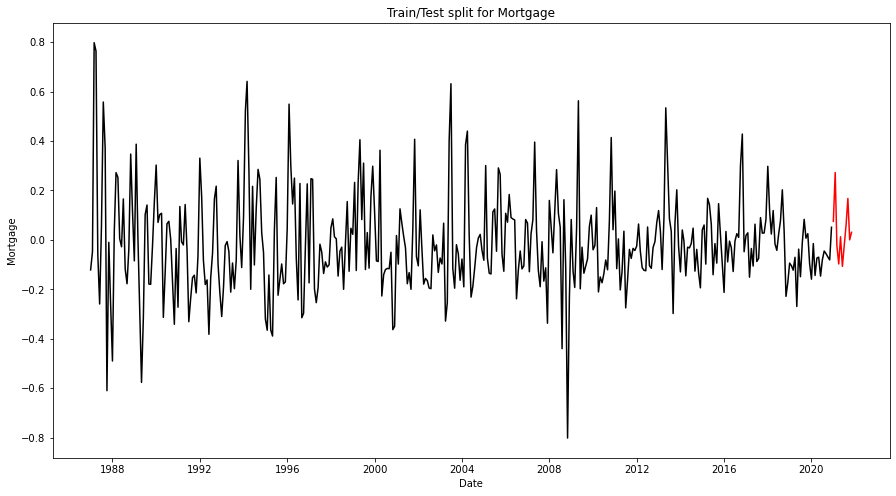

In [125]:
plt.figure(figsize=(15,8))
plt.plot(train_data_m, color = "black")
plt.plot(test_data_m, color = "red")
plt.ylabel('Mortgage')
plt.xlabel('Date')
plt.title("Train/Test split for Mortgage")
plt.show()

In [102]:
#ARMA 101
arma_model_m = ARIMA(train_data_m, order=(1,0,1))

start = time()
model_fit_m = arma_model_m.fit()
end = time()
print('Model Fitting Time', end - start)

print(model_fit_m.summary())



Model Fitting Time 0.2542850971221924
                               SARIMAX Results                                
Dep. Variable:               mortgage   No. Observations:                  384
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  96.537
Date:                Sun, 19 Feb 2023   AIC                           -185.073
Time:                        15:01:33   BIC                           -169.271
Sample:                    01-01-1987   HQIC                          -178.805
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0124      0.013     -0.924      0.355      -0.039       0.014
ar.L1         -0.1309      0.113     -1.160      0.246      -0.352       0.090
ma.L1         

In [143]:
#ARIMA 112
arima_model_m_112 = ARIMA(train_data_m, order=(1,1,2))

start = time()
model_fit_m_112 = arima_model_m_112.fit()
end = time()
print('Model Fitting Time', end - start)
print(model_fit_m_112.summary())

Model Fitting Time 0.5165655612945557
                               SARIMAX Results                                
Dep. Variable:               mortgage   No. Observations:                  408
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 108.519
Date:                Sun, 19 Feb 2023   AIC                           -209.038
Time:                        16:15:09   BIC                           -193.003
Sample:                    01-01-1987   HQIC                          -202.693
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1216      0.109     -1.116      0.264      -0.335       0.092
ma.L1         -0.4917      1.736     -0.283      0.777      -3.894       2.911
ma.L2         

In [141]:
#ARMA 201
arma_model_m = ARIMA(train_data_m, order=(2,0,1))

start = time()
model_fit_m = arma_model_m.fit()
end = time()
print('Model Fitting Time', end - start)
print(model_fit_m.summary())

Model Fitting Time 0.39268946647644043
                               SARIMAX Results                                
Dep. Variable:               mortgage   No. Observations:                  408
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 112.773
Date:                Sun, 19 Feb 2023   AIC                           -215.546
Time:                        16:12:47   BIC                           -195.489
Sample:                    01-01-1987   HQIC                          -207.609
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0157      0.012     -1.322      0.186      -0.039       0.008
ar.L1          0.0569      0.183      0.310      0.756      -0.302       0.416
ar.L2        

                0
count  408.000000
mean     0.000155
std      0.181869
min     -0.646246
25%     -0.111350
50%     -0.017516
75%      0.097735
max      0.806923


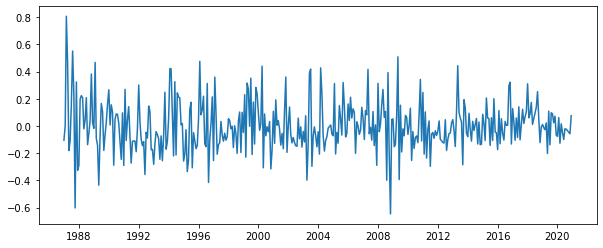

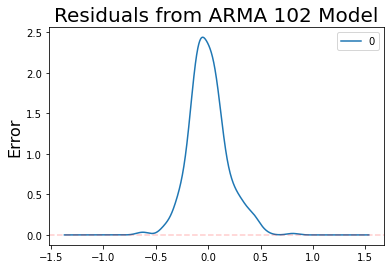

In [132]:
# residuals

plt.figure(figsize=(10,4))

residuals_m_102 = pd.DataFrame(model_fit_m_102.resid)
plt.plot(residuals_m_102)
residuals_m_102.plot(kind='kde')
print(residuals_m_102.describe())


plt.title('Residuals from ARMA 102 Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

plt.show()


In [127]:
residuals_m_102.to_csv('US_mortgage_tsr_res_102.csv', index=False)

In [131]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(residuals_m_102, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,8.270414,0.602442


# Forecast

In [134]:
predictions_m = model_fit_m_102.get_forecast(len(test_data_m.index))
predictions_m_df = predictions_m.conf_int(alpha = 0.05) 


In [135]:
predictions_m_df["Predictions"] = model_fit_m_102.predict(start = predictions_m_df.index[0], end = predictions_m_df.index[-1])
predictions_m_df.index = test_data_m.index
predictions_m_out = predictions_m_df["Predictions"] 

C:\Apps\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


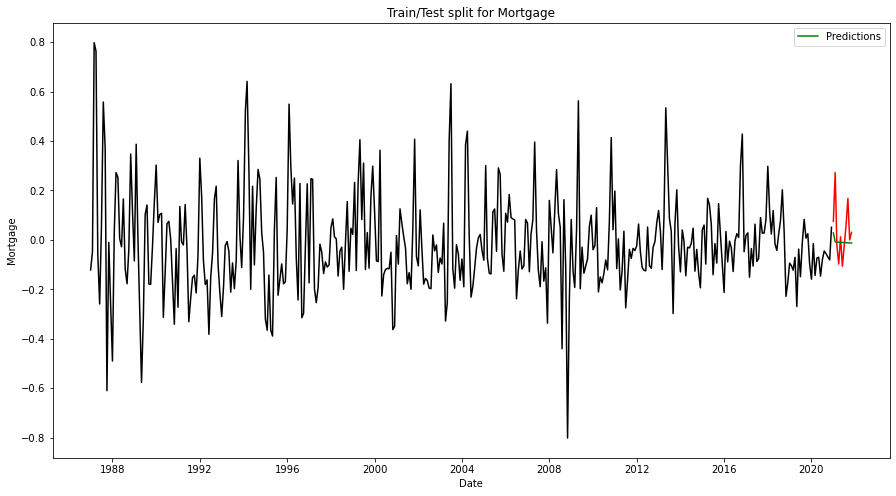

In [139]:

plt.figure(figsize=(15, 8))
plt.plot(train_data_m, color = "black")
plt.plot(test_data_m, color = "red")
plt.ylabel('Mortgage')
plt.xlabel('Date')
plt.title("Train/Test split for Mortgage")
plt.plot(predictions_m_out, color='green', label = 'Predictions')
plt.legend()

In [ ]:
model_fit_m_112

In [144]:
predictions_m = model_fit_m_112.get_forecast(len(test_data_m.index))
predictions_m_df = predictions_m.conf_int(alpha = 0.05) 
predictions_m_df["Predictions"] = model_fit_m_112.predict(start = predictions_m_df.index[0], end = predictions_m_df.index[-1])
predictions_m_df.index = test_data_m.index
predictions_m_out = predictions_m_df["Predictions"] 

C:\Apps\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


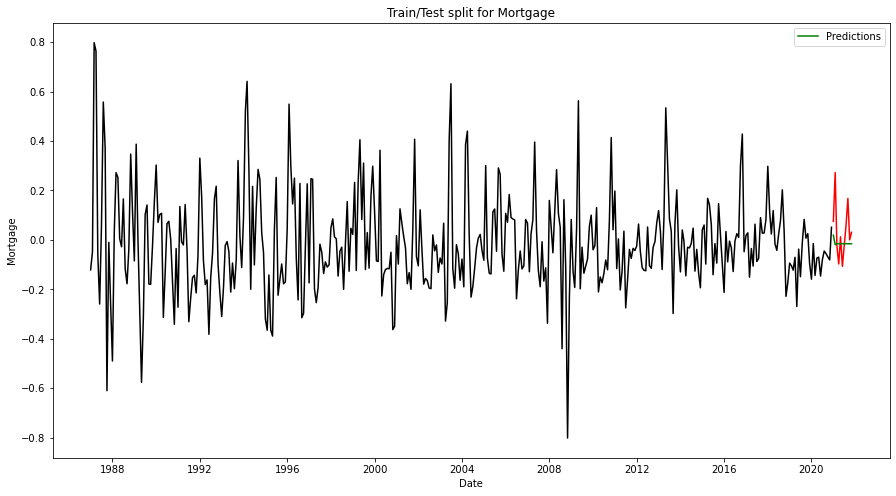

In [145]:
plt.figure(figsize=(15, 8))
plt.plot(train_data_m, color = "black")
plt.plot(test_data_m, color = "red")
plt.ylabel('Mortgage')
plt.xlabel('Date')
plt.title("Train/Test split for Mortgage")
plt.plot(predictions_m_out, color='green', label = 'Predictions')
plt.legend()

In [109]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.8254981729090671
